<a href="https://colab.research.google.com/github/jai13717/finlatics/blob/main/Finlatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('online_advertising_performance_data.csv')
df = df.iloc[:,:-2 ]
X = df[["month", 'day']].values
y = df['user_engagement'].values

In [ ]:
print(X)
print(y)

[['April' 1]
 ['April' 1]
 ['April' 1]
 ...
 ['June' 29]
 ['June' 29]
 ['June' 29]]
['High' 'High' 'High' ... 'High' 'High' 'High']


In [ ]:
day = [0]*len(X)
print(len(day))
for i in range(len(y)):
  if X[i,0] == 'May':
    day[i] = 30 + X[i,1]
  elif X[i,0] == 'June':
    day[i] = 30 + 31 + X[i,1]
  elif X[i,0] == 'April':
    day[i] = X[i,1]
print(day)


15408
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print("Finished ENcoding Dependant Variable")
print(y)

Finished ENcoding Dependant Variable
[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.impute import SimpleImputer
day = np.array(day)

if np.issubdtype(day.dtype, np.number):
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer.fit(day.reshape(-1, 1))
    day = imputer.transform(day.reshape(-1, 1))
    day = day.ravel()
    day = day.astype(int)

print("Finished Encoding Numerical data")
print(day)

Finished Encoding Numerical data
[ 1  1  1 ... 90 90 90]


In [ ]:
days = [0]*90
engagement = [0]*90
j = 0
for j in range(90):
  cd = 0
  sd = 0
  for i in range(len(y)):
    if day[i] == j:
      cd = cd + 1
      sd = sd + y[i]
  days[j] = j+1
  if cd != 0:
    engagement[j] = sd/cd
  else:
    engagement[j] = 0


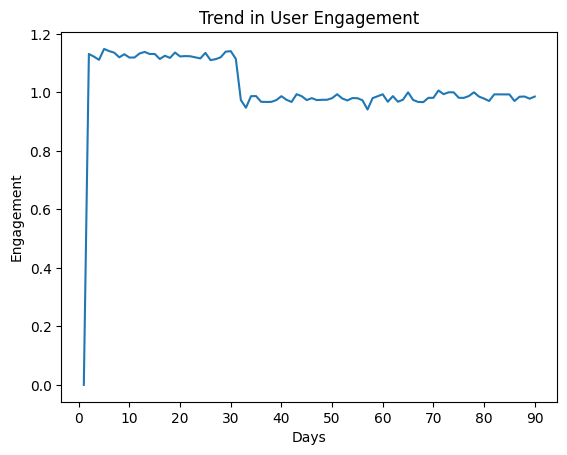

In [ ]:
plt.plot (days,engagement)
plt.xlabel('Days')
plt.ylabel('Engagement')
plt.title('Trend in User Engagement')
plt.xticks(np.arange(0, 91, 10), np.arange(0, 91, 10))
plt.show()

# Question 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns

In [ ]:
df = pd.read_csv('online_advertising_performance_data.csv')
df = df.iloc[:,:-2 ]
X = df[['banner']].values
imputermean = SimpleImputer(strategy='mean')
df['clicks'] = imputermean.fit_transform(df[['clicks']]).ravel()
df['displays'] = imputermean.fit_transform(df[['displays']]).ravel()
df['ctr'] = df['clicks']/df['displays'].values
df['ctr'] = df['ctr'].replace([np.inf, -np.inf], 0)
plot = df.groupby('banner')['ctr'].mean().reset_index()

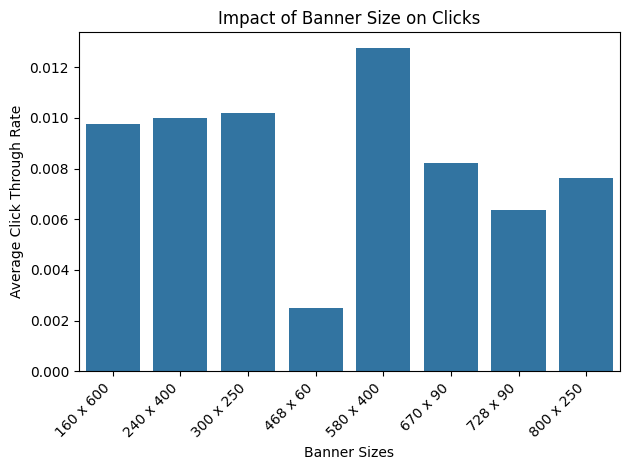

In [ ]:

sns.barplot(x = 'banner', y = 'ctr', data = plot)
plt.xlabel("Banner Sizes")
plt.ylabel("Average Click Through Rate")
plt.title("Impact of Banner Size on Clicks")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Question 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('online_advertising_performance_data.csv')
df = df.iloc[:,:-2 ]
imputer = SimpleImputer(strategy='most_frequent')
imputermean = SimpleImputer(strategy='mean')
df['placement'] = imputer.fit_transform(df[['placement']]).ravel()
df['clicks'] = imputermean.fit_transform(df[['clicks']]).ravel()
df['displays'] = imputermean.fit_transform(df[['displays']]).ravel()
X = df[['clicks', 'displays']].values
y = df['placement'].values

In [ ]:
clicks = df.groupby('placement')['clicks'].sum().reset_index()
displays = df.groupby('placement')['displays'].sum().reset_index()

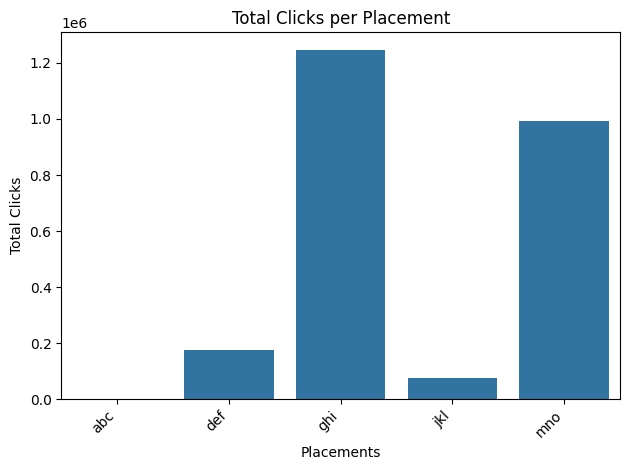

In [ ]:
sns.barplot(x = 'placement', y = 'clicks', data = clicks)
plt.xlabel("Placements")
plt.ylabel("Total Clicks")
plt.title("Total Clicks per Placement")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

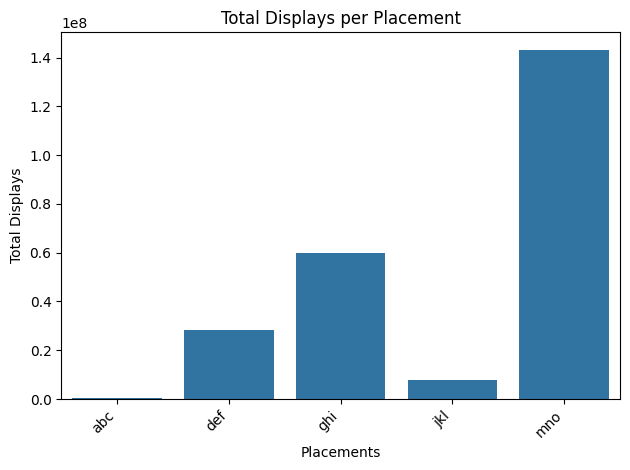

In [ ]:
sns.barplot(x = 'placement', y = 'displays', data = displays)
plt.xlabel("Placements")
plt.ylabel("Total Displays")
plt.title("Total Displays per Placement")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Question 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('online_advertising_performance_data.csv')
df = df.iloc[:,:-2 ]
imputer = SimpleImputer(strategy='mean')
df['cost'] = imputer.fit_transform(df[['cost']]).ravel()
df['revenue'] = imputer.fit_transform(df[['revenue']]).ravel()
X = df['cost'].values
y = df['revenue'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

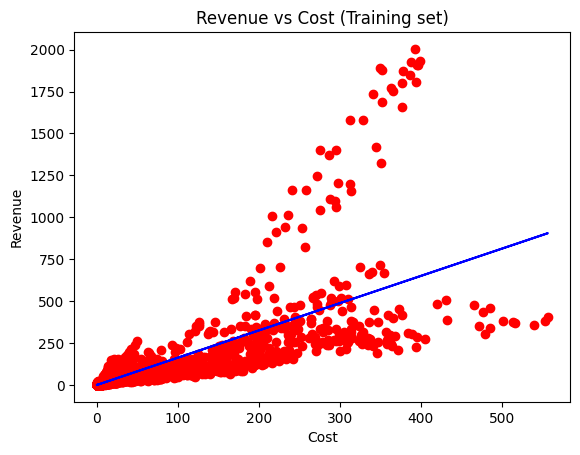

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Revenue vs Cost (Training set)')
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.show()

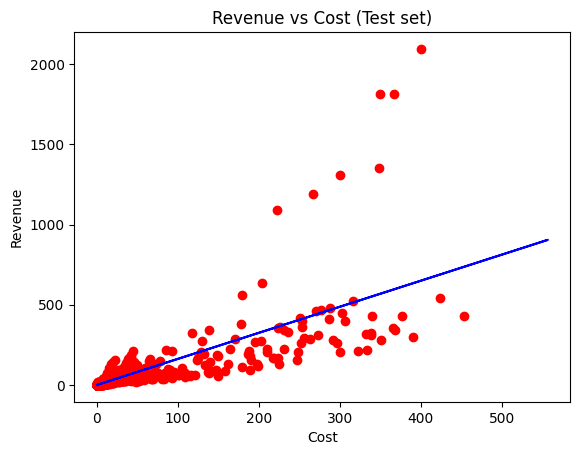

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Revenue vs Cost (Test set)')
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.show()

# Question 5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('online_advertising_performance_data.csv')
df = df.iloc[:,:-2 ]
imputermean = SimpleImputer(strategy='mean')
df['clicks'] = imputermean.fit_transform(df[['clicks']]).ravel()
df['revenue'] = imputermean.fit_transform(df[['revenue']]).ravel()
clicks = df[['clicks']].values
revenue = df['revenue'].values

In [ ]:
totalclicks = 0
totalrevenue = 0

for i in range(len(y)):
  totalclicks = totalclicks + clicks[i]
  totalrevenue = totalrevenue + revenue[i]
print(totalrevenue/totalclicks)

[0.11082336]


# Question 6

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns

In [ ]:
df = pd.read_csv('online_advertising_performance_data.csv')
df = df.iloc[:,:-2 ]
imputermean = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='most_frequent')
df['clicks'] = imputermean.fit_transform(df[['clicks']]).ravel()
df['post_click_conversions'] = imputermean.fit_transform(df[['revenue']]).ravel()
df['campaign_number'] =  imputer.fit_transform(df[['campaign_number']]).ravel()
df['pccr'] = df['post_click_conversions']/df['clicks'].values
df['pccr'] = df['pccr'].replace([np.inf, -np.inf], 0)

In [ ]:
plot = df.groupby('campaign_number')['pccr'].mean().reset_index()

Text(0.5, 1.0, 'Post-Click Conversion Rate per Campaign')

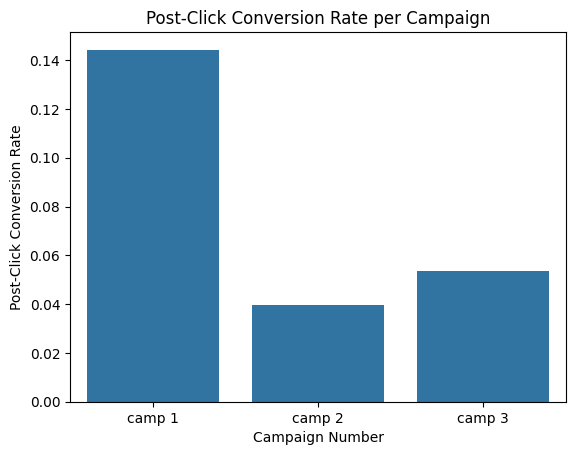

In [ ]:
sns.barplot(x = 'campaign_number', y = 'pccr', data = plot)
plt.xlabel("Campaign Number")
plt.ylabel("Post-Click Conversion Rate")
plt.title("Post-Click Conversion Rate per Campaign")

plt.title("Post-Click Conversion Rate per Campaign")


# Question 7

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('online_advertising_performance_data.csv')
df = df.iloc[:,:-2 ]
imputermean = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='most_frequent')
df['day'] = imputermean.fit_transform(df[['day']]).ravel()
df['post_click_sales_amount'] = imputermean.fit_transform(df[['post_click_sales_amount']]).ravel()
df['month'] = imputer.fit_transform(df[['month']]).ravel()

In [ ]:

for i in range(len(df)):
  if df.loc[i, 'month'] == 'May':
    df.loc[i, 'day'] = 30 + df.loc[i, 'day']
  elif df.loc[i, 'month'] == 'June':
    df.loc[i, 'day'] = 30 + 31 + df.loc[i, 'day']
  elif df.loc[i, 'month'] == 'April':
   df.loc[i, 'day'] = df.loc[i, 'day']
print(df['day'])
plot = df.groupby('day')['post_click_sales_amount'].sum().reset_index()

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
15403     1.0
15404     1.0
15405    90.0
15406    90.0
15407    90.0
Name: day, Length: 15408, dtype: float64


Text(0.5, 1.0, 'Trend in Post Click Sales')

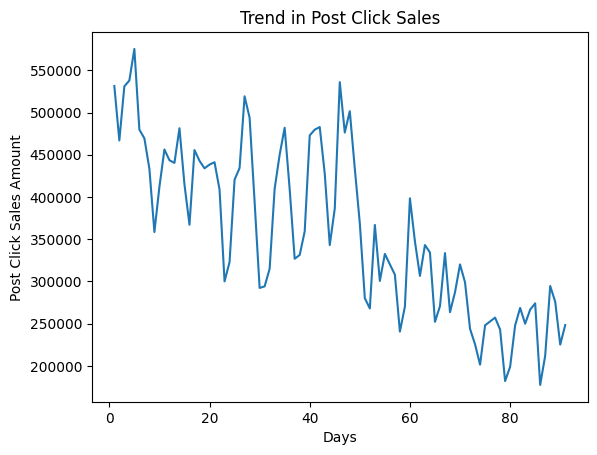

In [ ]:
plt.plot(plot['day'], plot['post_click_sales_amount'])
plt.xlabel('Days')
plt.ylabel('Post Click Sales Amount')
plt.title('Trend in Post Click Sales')

# Question 8

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('online_advertising_performance_data.csv')
df = df.iloc[:,:-2 ]
imputermean = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='most_frequent')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['user_engagement'] = le.fit_transform(df[['user_engagement']]).ravel()
df['banner'] = imputer.fit_transform(df[['banner']]).ravel()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
plot = df.groupby('banner')['user_engagement'].mean().reset_index()

0.6717235336784751


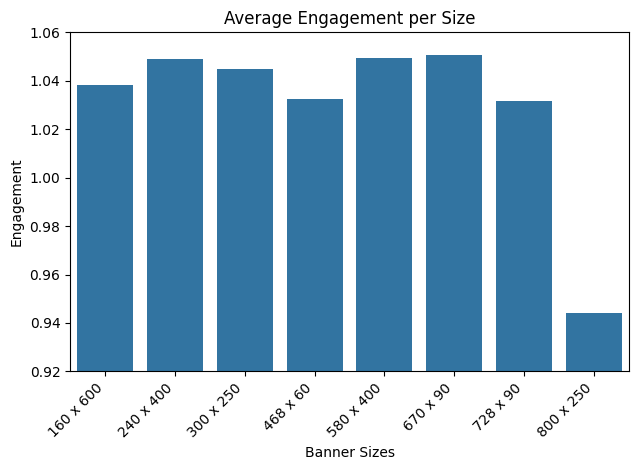

In [ ]:
sns.barplot(x = 'banner', y = 'user_engagement', data = plot)
plt.xlabel("Banner Sizes")
plt.ylabel("Engagement")
plt.title("Average Engagement per Size")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0.92, 1.06)
plt.show()



[link text](https://)# Highest Post-Click Conversion Rates for Placements

# Question 9

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('online_advertising_performance_data.csv')
df = df.iloc[:,:-2 ]
imputermean = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='most_frequent')
df['clicks'] = imputermean.fit_transform(df[['clicks']]).ravel()
df['post_click_conversions'] = imputermean.fit_transform(df[['revenue']]).ravel()
df['placement'] =  imputer.fit_transform(df[['placement']]).ravel()
clicks = df[['clicks']].values
conversions = df['post_click_conversions'].values
placement = df['placement'].values

In [ ]:
difplacements = np.unique(placement)
postclickconversionrate = [0]*len(difplacements)
print(difplacements)
for j in range(len(difplacements)):
  totalclicks = 0
  totalconversions = 0
  for i in range(len(clicks)):
    if placement[i] == difplacements[j]:
      totalclicks = totalclicks + clicks[i]
      totalconversions = totalconversions + conversions[i]
  postclickconversionrate[j] = totalconversions/float(totalclicks)
  print(postclickconversionrate[j])

['abc' 'def' 'ghi' 'jkl' 'mno']
0.08854823232323232
0.09007101540628193
0.12152537871406797
0.10996747931737348
0.10116417318870079


<ipython-input-3-fc414c46cb9f>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  postclickconversionrate[j] = totalconversions/float(totalclicks)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'abc'),
  Text(1, 0, 'def'),
  Text(2, 0, 'ghi'),
  Text(3, 0, 'jkl'),
  Text(4, 0, 'mno')])

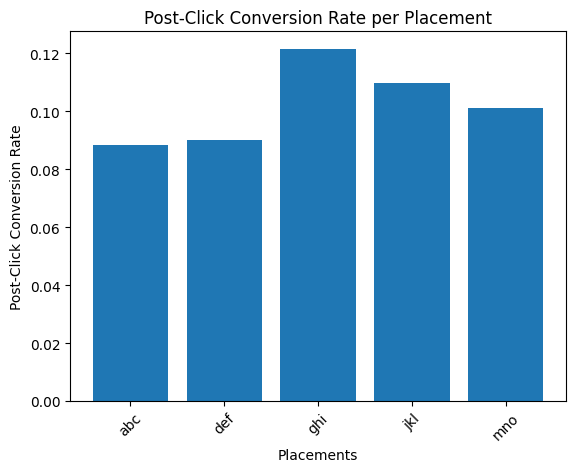

In [ ]:
plt.bar(x = difplacements, height = postclickconversionrate)
plt.xlabel("Placements")
plt.ylabel("Post-Click Conversion Rate")
plt.title("Post-Click Conversion Rate per Placement")
plt.xticks(rotation=45)

# Question 10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('online_advertising_performance_data.csv')
df = df.iloc[:,:-2 ]
imputer = SimpleImputer(strategy='most_frequent')
imputermean = SimpleImputer(strategy='mean')
df['clicks'] = imputermean.fit_transform(df[['clicks']]).ravel()
df['displays'] = imputermean.fit_transform(df[['displays']]).ravel()
clicks = df[['clicks']].values
displays = df['displays'].values
day = df['day'].values
month = df['month'].values

In [ ]:
for i in range(len(day)):
  if month[i] == 'May':
    day[i] = 30 + day[i]
  elif month[i] == 'June':
    day[i] = 30 + 31 + day[i]
  elif month[i] == 'April':
    day[i] = day[i]

dotw = [0]*len(day)
for i in range(len(day)):
  if day[i] % 7 == 0:
    dotw[i] = 2
  elif day[i] % 7 == 1:
    dotw[i] = 3
  elif day[i] % 7 == 2:
    dotw[i] = 4
  elif day[i] % 7 == 3:
    dotw[i] = 5
  elif day[i] % 7 == 4:
    dotw[i] = 6
  elif day[i] % 7 == 5:
    dotw[i] = 7
  elif day[i] % 7 == 6:
    dotw[i] = 1
print(dotw)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

In [ ]:
weekly = [0]*7
weeklyclicks = [0]*7
weeklydisplays = [0]*7
for i in range(len(weekly)):
  for j in range(len(day)):
    if dotw[j] == i+1:
      weeklyclicks[i] = weeklyclicks[i] + clicks[j]
      weeklydisplays[i] = weeklydisplays[i] + displays[j]
  weekly[i] = i+1

daily = [0]*90
dtrend = [0]*90
ctrend = [0]*90
j = 0
for j in range(90):
  sd = 0
  sc = 0
  for i in range(len(day)):
    if day[i] == j:
      sd = sd + displays[i]
      sc = sc + clicks[i]
  daily[j] = j+1
  dtrend[j] = sd
  ctrend[j] = sc if not isinstance(sc, (list, tuple, np.ndarray)) else sum(sc)


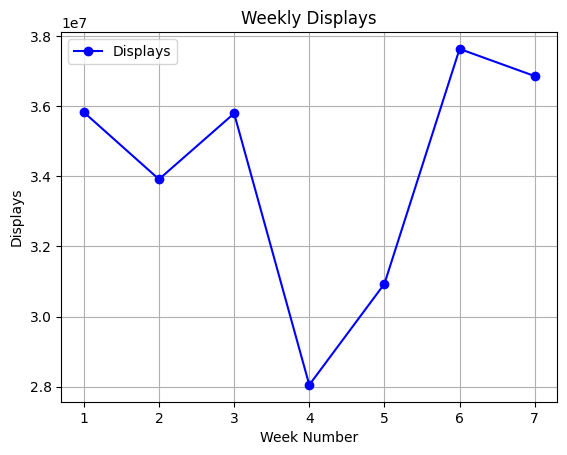

In [ ]:
plt.plot(weekly, weeklydisplays, marker='o', linestyle='-', color='b', label='Displays')
plt.title('Weekly Displays')
plt.xlabel('Day Number')
plt.ylabel('Displays')
plt.grid(True)
plt.legend()
plt.show()

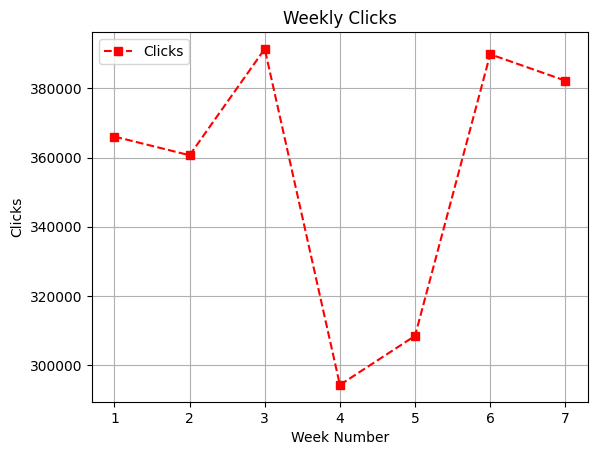

In [ ]:
plt.plot(weekly, weeklyclicks, marker='s', linestyle='--', color='r', label='Clicks')
plt.title('Weekly Clicks')
plt.xlabel('Week Number')
plt.ylabel('Clicks')
plt.grid(True)
plt.legend()
plt.show()

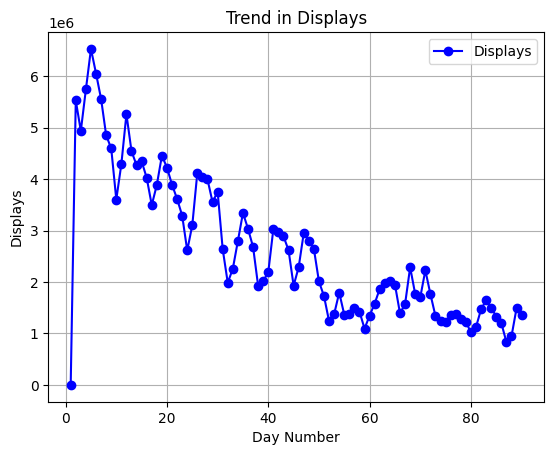

In [ ]:
plt.plot(daily, dtrend, marker='o', linestyle='-', color='b', label='Displays')
plt.title('Trend in Displays')
plt.xlabel('Day Number')
plt.ylabel('Displays')
plt.grid(True)
plt.legend()
plt.show()

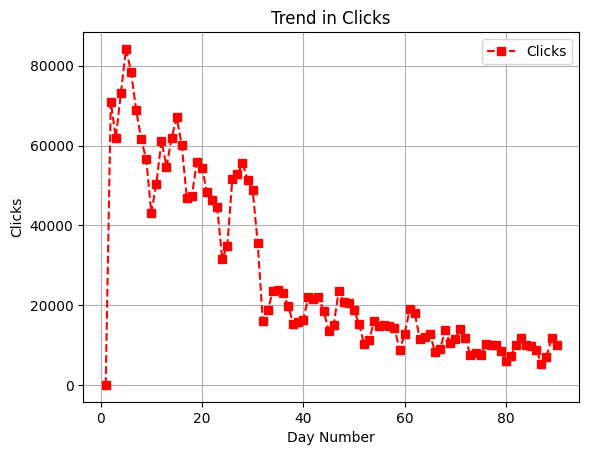

In [ ]:
plt.plot(daily, ctrend, marker='s', linestyle='--', color='r', label='Clicks')
plt.title('Trend in Clicks')
plt.xlabel('Day Number')
plt.ylabel('Clicks')
plt.grid(True)
plt.legend()
plt.show()

# Question 11

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns

In [ ]:
df = pd.read_csv('online_advertising_performance_data.csv')
df = df.iloc[:,:-2 ]
imputermean = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='most_frequent')
df['user_engagement'] = imputer.fit_transform(df[['user_engagement']]).ravel()
df['revenue'] = imputermean.fit_transform(df[['revenue']]).ravel()

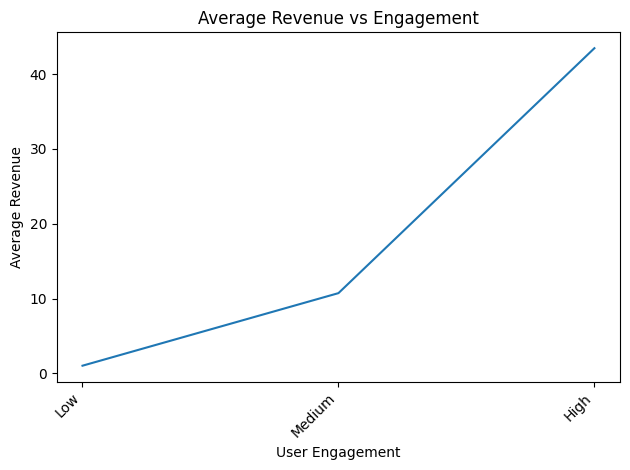

In [ ]:
engagement_revenue = df.groupby('user_engagement')['revenue'].mean().reset_index()
engagement_revenue = engagement_revenue.sort_values(by = ['revenue'])
sns.lineplot(x = 'user_engagement', y = 'revenue', data = engagement_revenue)
plt.xlabel("User Engagement")
plt.ylabel("Average Revenue")
plt.title("Average Revenue vs Engagement")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Question 12

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('online_advertising_performance_data.csv')
df = df.iloc[:,:-2 ]
imputermean = SimpleImputer(strategy='mean')
df['revenue'] = imputermean.fit_transform(df[['revenue']]).ravel()
df['cost'] = imputermean.fit_transform(df[['cost']]).ravel()
df['clicks'] = imputermean.fit_transform(df[['clicks']]).ravel()
clicks = pd.Series(df['clicks'])
revenue = pd.Series(df['revenue'])
cost = pd.Series(df['cost'])

In [ ]:
Q1 = clicks.quantile(0.25)
Q3 = clicks.quantile(0.75)
IQR = Q3 - Q1
c = 0
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for i in range(len(clicks)):
  if clicks[i] < lower_bound or clicks[i] > upper_bound:
    c = c + 1
print(c)
print(i)

2325
15407


In [ ]:
Q1 = revenue.quantile(0.25)
Q3 = revenue.quantile(0.75)
IQR = Q3 - Q1
c = 0
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for i in range(len(revenue)):
  if revenue[i] < lower_bound or revenue[i] > upper_bound:
    c = c + 1
print(c)
print(i)

2512
15407


In [ ]:
Q1 = cost.quantile(0.25)
Q3 = cost.quantile(0.75)
IQR = Q3 - Q1
c = 0
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for i in range(len(cost)):
  if cost[i] < lower_bound or cost[i] > upper_bound:
    c = c + 1
print(c)
print(i)

2515
15407


In [ ]:
Q1c = cost.quantile(0.25)
Q3c = cost.quantile(0.75)
IQRc = Q3c - Q1c
c = 0
lower_boundc = Q1c - 1.5 * IQRc
upper_boundc = Q3c + 1.5 * IQRc

Q1r = revenue.quantile(0.25)
Q3r = revenue.quantile(0.75)
IQRr = Q3r - Q1r
lower_boundr = Q1r - 1.5 * IQRr
upper_boundr = Q3r + 1.5 * IQRr

outlier_condition = ((cost < lower_boundc) | (cost > upper_boundc)) & ((revenue < lower_boundr) | (revenue > upper_boundr))
for i in range(len(outlier_condition)):
  if outlier_condition[i] == True:
    c = c+1
print(c)

2149


# Question 13

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [ ]:
df = pd.read_csv('online_advertising_performance_data.csv')
df = df.iloc[:,:-2 ]
imputermean = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='most_frequent')
df['banner'] = imputer.fit_transform(df[['banner']]).ravel()
df['placement'] = imputer.fit_transform(df[['placement']]).ravel()
df['revenue'] = imputermean.fit_transform(df[['revenue']]).ravel()
df['cost'] = imputermean.fit_transform(df[['cost']]).ravel()
df['clicks'] = imputermean.fit_transform(df[['clicks']]).ravel()
df['post_click_conversions'] = imputermean.fit_transform(df[['post_click_conversions']]).ravel()
df['displays'] = imputermean.fit_transform(df[['displays']]).ravel()
X = df[['banner', 'placement']].values
y_roi = ((df['revenue'] - df['cost'])/df['cost'])

for i in range(len(df)):
  if df.iloc[i]['cost'] == 0:
    y_roi[i] = 0

y_roi = imputermean.fit_transform(y_roi.values.reshape(-1, 1)).ravel()

y_cr = (df['post_click_conversions']*100/df['clicks'])

for i in range(len(df)):
  if df.iloc[i]['clicks'] == 0:
    y_cr[i] = 0

y_cr = imputermean.fit_transform(y_cr.values.reshape(-1, 1)).ravel()

y_ctr = (df['clicks']*100/df['displays'])

for i in range(len(df)):
  if df.iloc[i]['displays'] == 0:
    y_ctr[i] = 0

y_ctr = imputermean.fit_transform(y_ctr.values.reshape(-1, 1)).ravel()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1])], remainder='passthrough')
X = ct.fit_transform(X).toarray()
print(X)


[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
X_train_roi, X_test_roi, y_train_roi, y_test_roi = train_test_split(X, y_roi, test_size = 0.2, random_state = 1)
X_train_cr, X_test_cr, y_train_cr, y_test_cr = train_test_split(X, y_cr, test_size = 0.2, random_state = 1)
X_train_ctr, X_test_ctr, y_train_ctr, y_test_ctr = train_test_split(X, y_ctr, test_size = 0.2, random_state = 1)

In [ ]:
rf_regressor_roi = RandomForestRegressor(n_estimators=100, random_state=1)
rf_regressor_roi.fit(X_train_roi, y_train_roi)
y_pred_roi = rf_regressor_roi.predict(X_test_roi)

rf_regressor_cr = RandomForestRegressor(n_estimators=100, random_state=1)
rf_regressor_cr.fit(X_train_cr, y_train_cr)
y_pred_cr = rf_regressor_cr.predict(X_test_cr)

rf_regressor_ctr = RandomForestRegressor(n_estimators=100, random_state=1)
rf_regressor_ctr.fit(X_train_ctr, y_train_ctr)
y_pred_ctr = rf_regressor_ctr.predict(X_test_ctr)

In [ ]:

importances_roi = rf_regressor_roi.feature_importances_
importances_cr = rf_regressor_cr.feature_importances_
importances_ctr = rf_regressor_ctr.feature_importances_
importances_roi = importances_roi/importances_roi.sum()
importances_cr = importances_cr/importances_cr.sum()
importances_roi = importances_ctr/importances_ctr.sum()
feature_names = df[['banner', 'placement']].columns
categories = ct.named_transformers_['encoder'].categories_
new_feature_names = [f'{col}_{val}' for col, vals in zip(feature_names, categories) for val in vals]
importance = (importances_roi + importances_cr + importances_ctr)/3

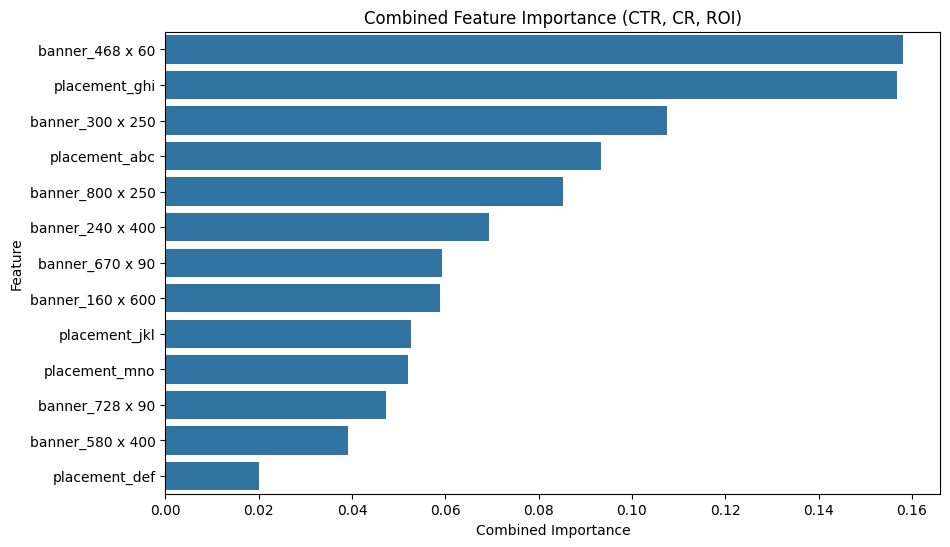

In [ ]:
importances = pd.DataFrame({
    'Feature': new_feature_names,
    'Combined Importance': importance
}).sort_values(by='Combined Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Combined Importance', y='Feature', data=importances)
plt.title('Combined Feature Importance (CTR, CR, ROI)')
plt.show()

# Question 14

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('online_advertising_performance_data.csv')
df = df.iloc[:,:-2 ]
imputermean = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='most_frequent')
df['banner'] = imputer.fit_transform(df[['banner']]).ravel()
df['campaign_number'] = imputer.fit_transform(df[['campaign_number']]).ravel()
df['revenue'] = imputermean.fit_transform(df[['revenue']]).ravel()
df['cost'] = imputermean.fit_transform(df[['cost']]).ravel()

X = df[['banner', 'campaign_number']].values

df['ROI'] = ((df['revenue'] - df['cost'])/df['cost'])
df['ROI'] = df['ROI'].replace([np.inf, -np.inf], 0)

In [ ]:

roibanner_df = df.groupby('banner')['ROI'].mean().reset_index()
roibanner = roibanner_df['ROI'].values
bannername = roibanner_df['banner'].values


roicamp_df = df.groupby('campaign_number')['ROI'].mean().reset_index()
roicamp = roicamp_df['ROI'].values
campname = roicamp_df['campaign_number'].values

In [ ]:
print(campname)
print(bannername)
print(roibanner)
print(roicamp)

['camp 1' 'camp 2' 'camp 3']
['160 x 600' '240 x 400' '300 x 250' '468 x 60' '580 x 400' '670 x 90'
 '728 x 90' '800 x 250']
[ 2.71433919  0.87990715  0.82969619  0.52970165  1.59436236  0.74963288
  0.37885549 -0.33831367]
[1.1487953  0.59123739 0.77603438]


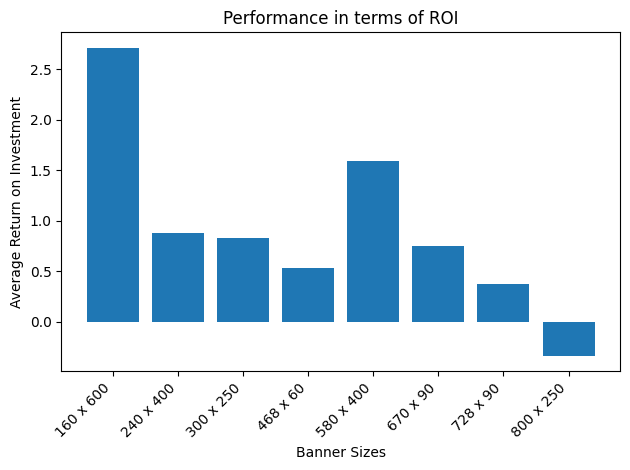

In [ ]:
plt.bar(x = bannername, height = roibanner)
plt.xlabel("Banner Sizes")
plt.ylabel("Average Return on Investment")
plt.title("Performance in terms of ROI")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<BarContainer object of 3 artists>

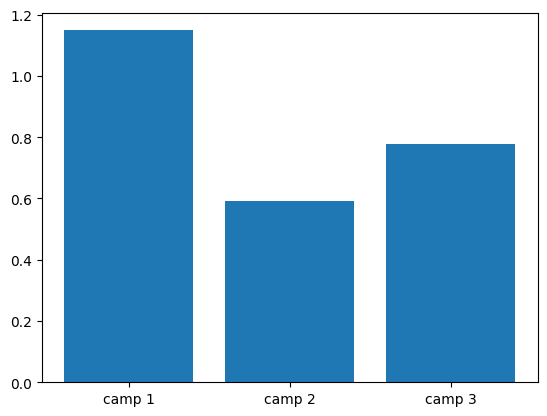

In [ ]:
plt.bar(x = campname, height = roicamp)

# Question 15

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns

In [ ]:
df = pd.read_csv('online_advertising_performance_data.csv')
df = df.iloc[:,:-2 ]
imputermean = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='most_frequent')
df['post_click_conversions'] = imputermean.fit_transform(df[['post_click_conversions']]).ravel()
df['campaign_number'] = imputer.fit_transform(df[['campaign_number']]).ravel()
groupedconversions = df.groupby('campaign_number')['post_click_conversions'].mean().reset_index()


Text(0.5, 1.0, 'Post Click Conversions to Campaigns')

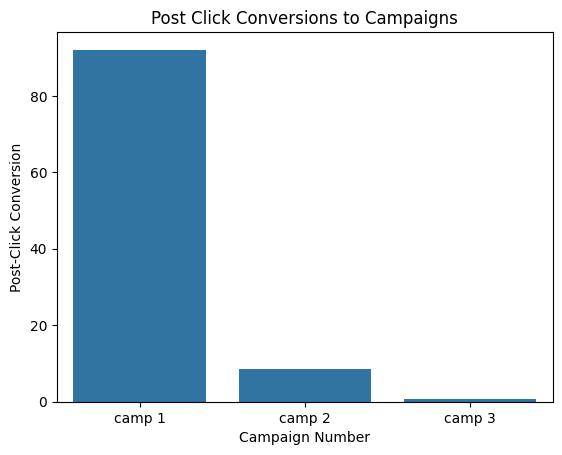

In [ ]:
sns.barplot(x = groupedconversions['campaign_number'], y = groupedconversions['post_click_conversions'])
plt.xlabel('Campaign Number')
plt.ylabel('Post-Click Conversion')
plt.title('Post Click Conversions to Campaigns')

# Question 16

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns

In [ ]:
df = pd.read_csv('online_advertising_performance_data.csv')
df = df.iloc[:,:-2 ]
imputermean = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='most_frequent')
df['day'] = imputer.fit_transform(df[['day']]).ravel()
df['month'] = imputer.fit_transform(df[['month']]).ravel()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['user_engagement'] = le.fit_transform(df['user_engagement'])

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

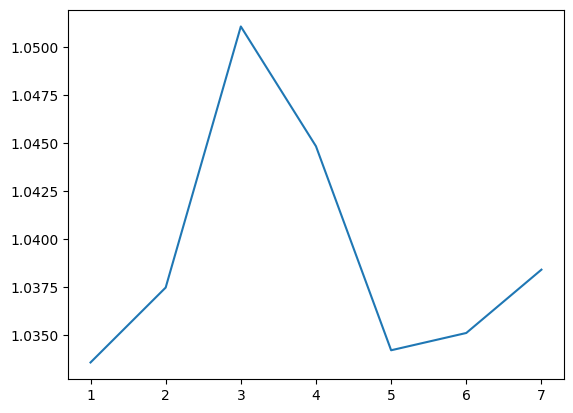

In [ ]:
for i in range(len(df)):
  if df.loc[i, 'month'] == 'May':
    df.loc[i, 'day'] = 30 + df.loc[i, 'day']
  elif df.loc[i, 'month'] == 'June':
    df.loc[i, 'day'] = 30 + 31 + df.loc[i, 'day']
  elif df.loc[i, 'month'] == 'April':
    df.loc[i, 'day'] = df.loc[i, 'day']

dotw = [0]*len(df)
for i in range(len(df)):
  if df.loc[i, 'day'] % 7 == 0:
    dotw[i] = 2
  elif df.loc[i, 'day'] % 7 == 1:
    dotw[i] = 3
  elif df.loc[i, 'day'] % 7 == 2:
    dotw[i] = 4
  elif df.loc[i, 'day'] % 7 == 3:
    dotw[i] = 5
  elif df.loc[i, 'day'] % 7 == 4:
    dotw[i] = 6
  elif df.loc[i, 'day'] % 7 == 5:
    dotw[i] = 7
  elif df.loc[i, 'day'] % 7 == 6:
    dotw[i] = 1
print(dotw)

dotw = pd.Series(dotw)
avgperday = df.groupby(dotw)['user_engagement'].mean()
print(avgperday)
plt.plot(avgperday.index, avgperday.values)


In [ ]:
i = 1
sum = 0
for i in range(1,6):
  sum = avgperday[i] + sum
  i = i+1
weekdayavg = sum/5
print(weekdayavg)
weekendavg = avgperday[6] + avgperday[7]
weekendavg = weekendavg/2
print(weekendavg)

1.0402170213142086
1.0367438830875697


# Question 17

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [ ]:
df = pd.read_csv('online_advertising_performance_data.csv')
df = df.iloc[:,:-2 ]
imputermean = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='most_frequent')
df['banner'] = imputer.fit_transform(df[['banner']]).ravel()
df['campaign_number'] = imputer.fit_transform(df[['campaign_number']]).ravel()
df['cost'] = imputermean.fit_transform(df[['cost']]).ravel()
df['clicks'] = imputermean.fit_transform(df[['clicks']]).ravel()
df['cpc'] = df['cost']/df['clicks']
df['cpc'] = df['cpc'].replace([np.inf, -np.inf], 0)
X = df[['banner', 'campaign_number']].values
y = df['cpc'].values
y = imputermean.fit_transform(y.reshape(-1, 1)).ravel()


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1])], remainder='passthrough')
X = ct.fit_transform(X).toarray()
print(X)

[[1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=1)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
importances = rf_regressor.feature_importances_
feature_names = df[['banner', 'campaign_number']].columns
categories = ct.named_transformers_['encoder'].categories_
new_feature_names_camp= [f'{col}_{val}' for col, vals in zip(feature_names, categories) for val in vals]

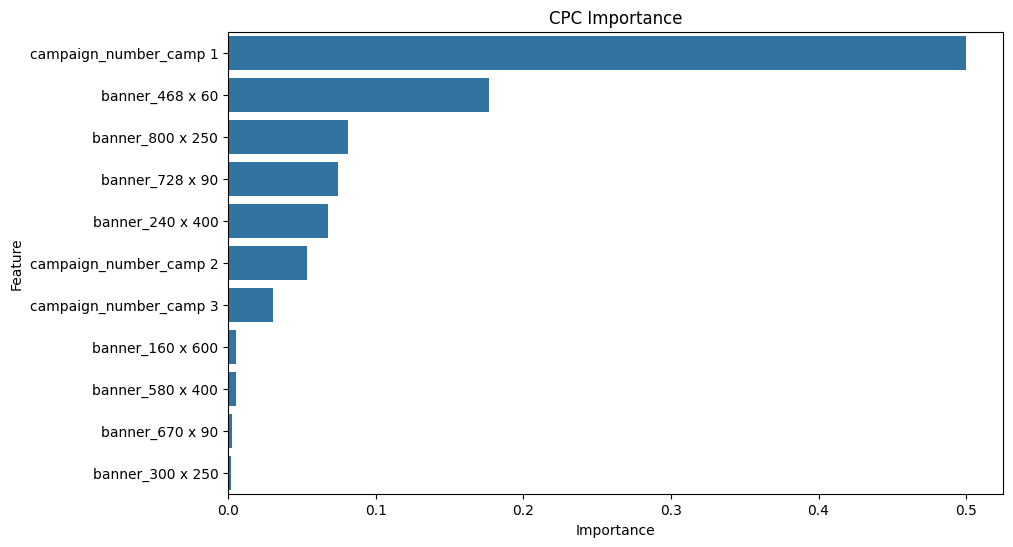

In [ ]:
importance = pd.DataFrame({
    'Feature': new_feature_names_camp,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('CPC Importance')
plt.show()

# Question 18

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [ ]:
df = pd.read_csv('online_advertising_performance_data.csv')
df = df.iloc[:,:-2 ]
imputermean = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='most_frequent')
df['placement'] = imputer.fit_transform(df[['placement']]).ravel()
df['campaign_number'] = imputer.fit_transform(df[['campaign_number']]).ravel()
df['cost'] = imputermean.fit_transform(df[['cost']]).ravel()
df['post_click_conversions'] = imputermean.fit_transform(df[['post_click_conversions']]).ravel()
df['cpconv'] = df['cost']/ df['post_click_conversions']
df['cpconv'] = df['cpconv'].replace([np.inf, -np.inf], 0)
df['measurepcc'] = df['post_click_conversions']/df['cost']
df['measurepcc'] = df['measurepcc'].replace([np.inf, -np.inf], 0)
measurepcccamp = df.groupby('campaign_number')['measurepcc'].mean().reset_index()
measurepccplacement = df.groupby('placement')['measurepcc'].mean().reset_index()
print(measurepcccamp)
print(measurepccplacement)


  campaign_number  measurepcc
0          camp 1    2.921693
1          camp 2    0.722021
2          camp 3    0.474958
  placement  measurepcc
0       abc    1.178967
1       def    1.623618
2       ghi    1.755379
3       jkl    1.923131
4       mno    1.375356


Text(0.5, 1.0, 'Campaign vs Cost Efficiency')

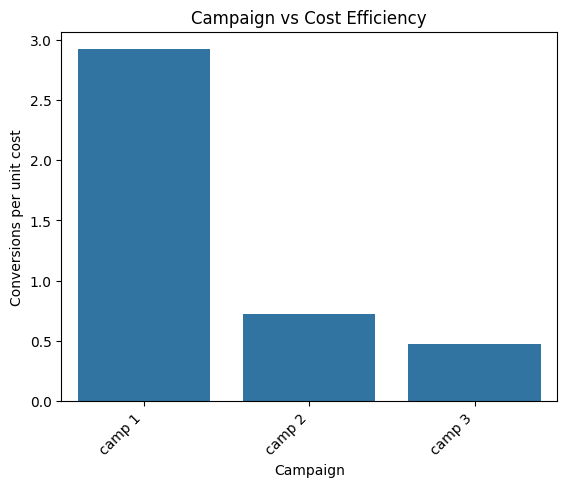

In [ ]:
sns.barplot(x = 'campaign_number', y = 'measurepcc', data = measurepcccamp)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Campaign')
plt.ylabel('Conversions per unit cost')
plt.title('Campaign vs Cost Efficiency')

Text(0.5, 1.0, 'Placement vs Cost Efficiency')

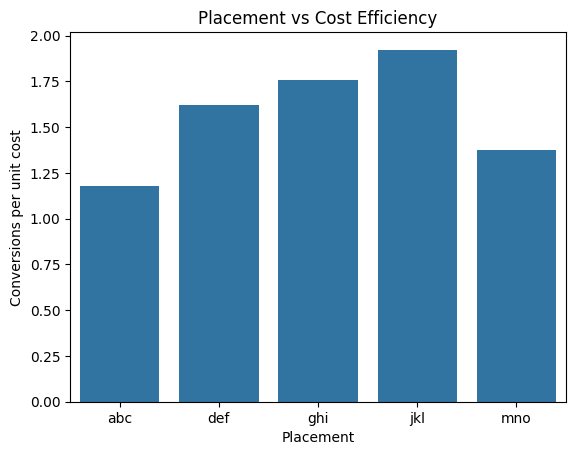

In [ ]:
sns.barplot(x = 'placement', y = 'measurepcc', data = measurepccplacement)
plt.xlabel('Placement')
plt.ylabel('Conversions per unit cost')
plt.title('Placement vs Cost Efficiency')

# Question 19

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns

In [ ]:
df = pd.read_csv('online_advertising_performance_data.csv')
df = df.iloc[:,:-2 ]
imputermean = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='most_frequent')
df['day'] = imputer.fit_transform(df[['post_click_conversions']]).ravel()
df['month'] = imputer.fit_transform(df[['campaign_number']]).ravel()
df['post_click_conversions'] = imputermean.fit_transform(df[['post_click_conversions']]).ravel()
df['clicks'] = imputermean.fit_transform(df[['clicks']]).ravel()
df['pccrate'] = df['post_click_conversions']/df['clicks']
df['pccrate'] = df['pccrate'].replace([np.inf, -np.inf], 0)

[2, 4, 3, 3, 2, 2, 5, 6, 2, 1, 2, 2, 7, 2, 2, 4, 3, 2, 5, 7, 7, 2, 2, 3, 2, 1, 7, 2, 2, 2, 2, 1, 3, 3, 7, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 3, 6, 2, 2, 3, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 5, 4, 2, 2, 2, 2, 3, 2, 3, 6, 4, 5, 2, 2, 2, 2, 5, 2, 6, 5, 2, 2, 5, 2, 2, 6, 1, 6, 6, 2, 2, 4, 2, 3, 2, 2, 5, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 7, 2, 1, 3, 3, 2, 7, 2, 3, 6, 5, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 1, 3, 4, 6, 4, 2, 2, 2, 2, 2, 5, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 4, 2, 2, 2, 2, 4, 2, 3, 2, 2, 3, 2, 2, 2, 7, 5, 5, 2, 2, 4, 2, 2, 4, 3, 5, 2, 2, 2, 5, 2, 2, 3, 7, 3, 5, 2, 6, 6, 1, 2, 2, 2, 2, 2, 2, 2, 4, 5, 3, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 7, 2, 7, 4, 3, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 6, 2, 7, 4, 2, 3, 2, 6, 1, 6, 4, 2, 2, 2, 2, 2, 2, 5, 2, 3, 2, 6, 3, 5, 6, 4, 3, 2, 2, 2, 3, 2, 4, 2, 3, 7, 4, 3, 2, 2, 2, 2, 2, 2, 2, 5, 3, 2, 2, 2, 2, 2, 3, 2, 7, 2, 2, 3, 6, 2, 1, 4, 5, 3, 2, 2, 2, 2, 

Text(0.5, 1.0, 'Post click conversion rate per day of the week')

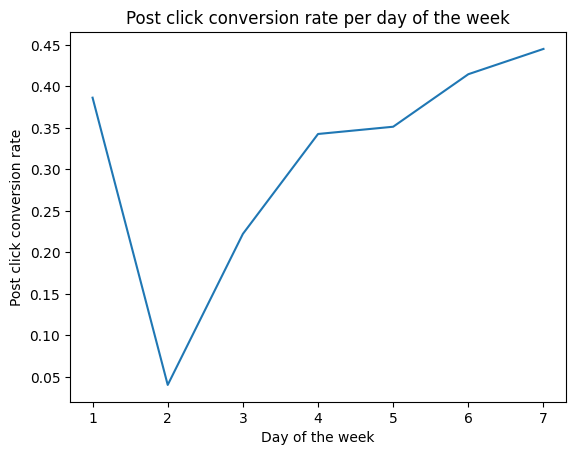

In [ ]:
for i in range(len(df)):
  if df.loc[i, 'month'] == 'May':
    df.loc[i, 'day'] = 30 + df.loc[i, 'day']
  elif df.loc[i, 'month'] == 'June':
    df.loc[i, 'day'] = 30 + 31 + df.loc[i, 'day']
  elif df.loc[i, 'month'] == 'April':
    df.loc[i, 'day'] = df.loc[i, 'day']

dotw = [0]*len(df)
for i in range(len(df)):
  if df.loc[i, 'day'] % 7 == 0:
    dotw[i] = 2
  elif df.loc[i, 'day'] % 7 == 1:
    dotw[i] = 3
  elif df.loc[i, 'day'] % 7 == 2:
    dotw[i] = 4
  elif df.loc[i, 'day'] % 7 == 3:
    dotw[i] = 5
  elif df.loc[i, 'day'] % 7 == 4:
    dotw[i] = 6
  elif df.loc[i, 'day'] % 7 == 5:
    dotw[i] = 7
  elif df.loc[i, 'day'] % 7 == 6:
    dotw[i] = 1
print(dotw)

dotw = pd.Series(dotw)
avgperday = df.groupby(dotw)['pccrate'].mean()
print(avgperday)
plt.plot(avgperday.index, avgperday.values)
plt.xlabel('Day of the week')
plt.ylabel('Post click conversion rate')
plt.title('Post click conversion rate per day of the week')

# Question 20

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns

In [ ]:
adf = pd.read_csv('online_advertising_performance_data.csv')
df = df.iloc[:,:-2 ]
imputermean = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='most_frequent')
df['campaign_number'] = imputer.fit_transform(df[['campaign_number']]).ravel()
df['post_click_conversions'] = imputermean.fit_transform(df[['post_click_conversions']]).ravel()
df['clicks'] = imputermean.fit_transform(df[['clicks']]).ravel()
df['pccr'] = df['post_click_conversions']/df['clicks']
df['pccr'] = df['pccr'].replace([np.inf, -np.inf], 0)

campgroup = df.groupby('campaign_number')['pccr'].mean().reset_index()
print(campgroup)
engagementgroup = df.groupby('user_engagement')['pccr'].mean().reset_index()
print(engagementgroup)

  campaign_number      pccr
0          camp 1  0.354652
1          camp 2  0.020079
2          camp 3  0.045453
  user_engagement      pccr
0            High  0.421542
1             Low  0.049330
2          Medium  0.073926


In [ ]:
camptypes = np.unique(df['campaign_number'])
print(camptypes)
engagementtypes = np.unique(df['user_engagement'])
print(engagementtypes)

['camp 1' 'camp 2' 'camp 3']
['High' 'Low' 'Medium']


<BarContainer object of 3 artists>

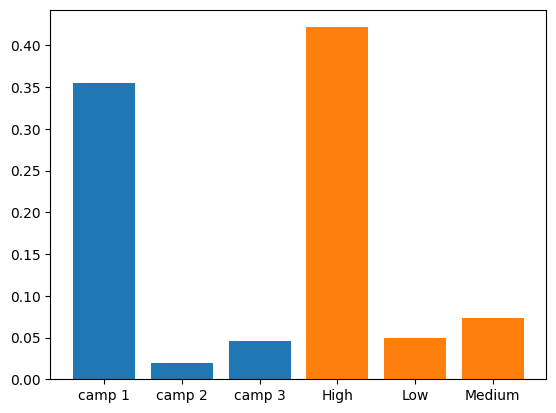

In [ ]:
plt.bar(campgroup['campaign_number'], campgroup['pccr'])
plt.bar(engagementgroup['user_engagement'], engagementgroup['pccr'])

In [ ]:
comparison = df.groupby(['campaign_number', 'user_engagement'])['pccr'].mean().reset_index()
print(comparison)

  campaign_number user_engagement      pccr
0          camp 1            High  0.648737
1          camp 1             Low  0.125246
2          camp 1          Medium  0.153676
3          camp 2             Low  0.018342
4          camp 2          Medium  0.021589
5          camp 3            High  0.120022
6          camp 3             Low  0.005268
7          camp 3          Medium  0.009969


<Axes: xlabel='campaign_number', ylabel='pccr'>

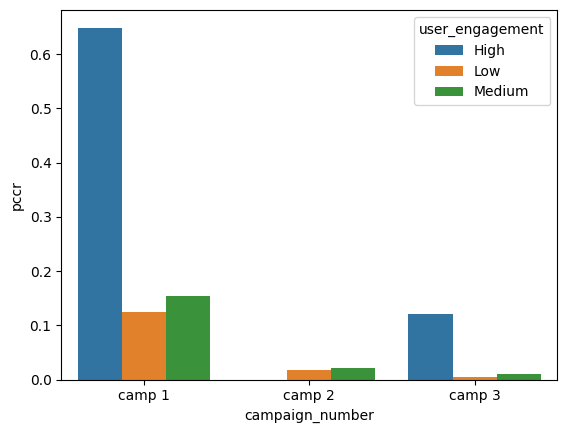

In [ ]:
sns.barplot(x='campaign_number', y='pccr', hue='user_engagement', data=comparison)